Question 1-1

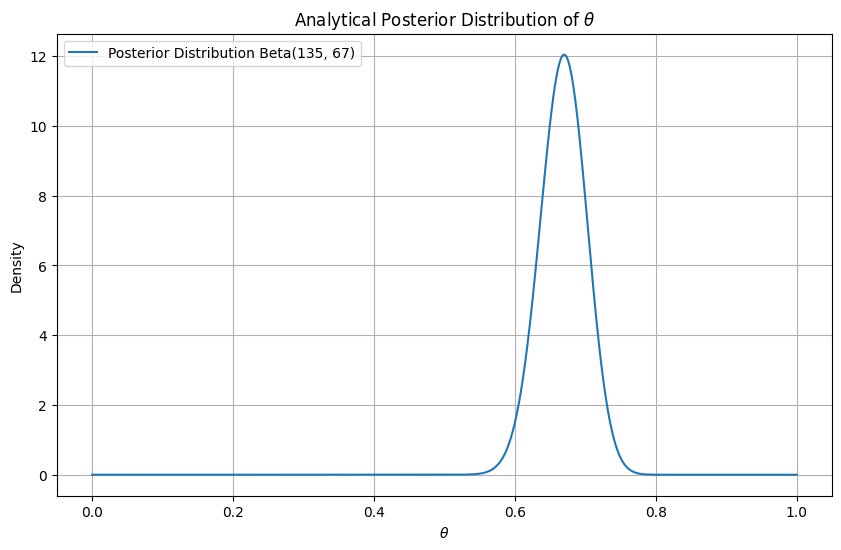

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta, binom, uniform, norm, truncnorm

# analytical posterior distribution visualization
parameter_range = np.linspace(0, 1, 1000)
theoretical_posterior_density = beta.pdf(parameter_range, a=135, b=67)

# theoretical posterior visualization
plt.figure(figsize=(10, 6))
plt.plot(parameter_range, theoretical_posterior_density, label='Posterior Distribution Beta(135, 67)')
plt.title('Analytical Posterior Distribution of $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Question 1-2

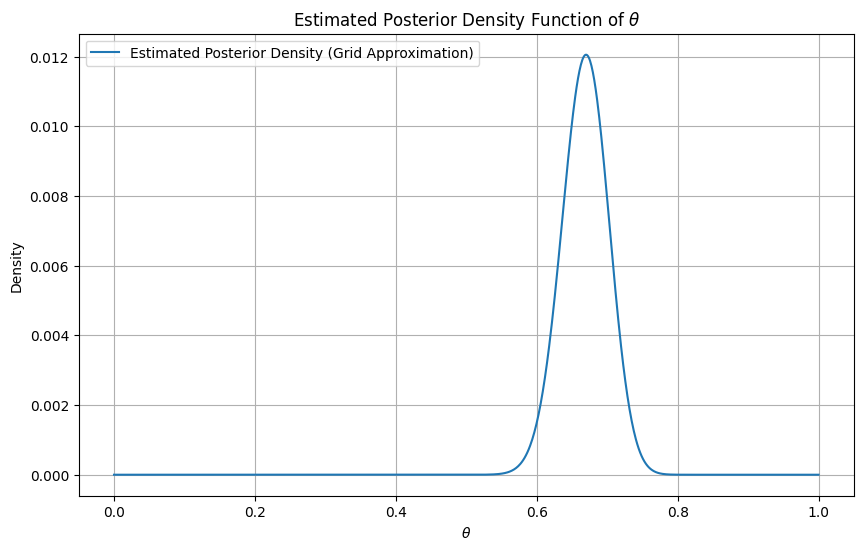

In [22]:
# Grid approximation:

observations = [10, 15, 15, 14, 14, 14, 13, 11, 12, 16]
trial_count = 20  # trials per observation
parameter_grid = np.linspace(0, 1, 1000)
prior_distribution = np.ones_like(parameter_grid)  # uniform prior Beta(1,1)
likelihood_values = np.ones_like(parameter_grid)

for observation in observations:
    likelihood_values *= binom.pmf(observation, trial_count, parameter_grid)

raw_posterior = prior_distribution * likelihood_values
normalized_posterior = raw_posterior / np.sum(raw_posterior)

plt.figure(figsize=(10, 6))
plt.plot(parameter_grid, normalized_posterior, label='Estimated Posterior Density (Grid Approximation)')
plt.title('Estimated Posterior Density Function of $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Question 1-3

In [23]:
# Monte Carlo estimation of marginal likelihood:

sample_count = 100000
sampled_parameters = beta.rvs(1, 1, size=sample_count)
likelihood_products = np.ones(sample_count)

for observation in observations:
    likelihood_products *= binom.pmf(observation, trial_count, sampled_parameters)

estimated_marginal_likelihood = np.mean(likelihood_products)
print(f'Marginal Likelihood = {estimated_marginal_likelihood}')

Marginal Likelihood = 1.4225413132176766e-10


Question 1-4

In [24]:
# Importance sampling:

importance_samples = uniform.rvs(0, 1, size=sample_count)
importance_likelihoods = np.ones(sample_count)

for observation in observations:
    importance_likelihoods *= binom.pmf(observation, trial_count, importance_samples)

prior_values = beta.pdf(importance_samples, 1, 1)
proposal_densities = uniform.pdf(importance_samples, 0, 1)

importance_weights = importance_likelihoods * prior_values / proposal_densities
importance_weights /= np.sum(importance_weights)

# weighted sample dataframe
sample_dataframe = pd.DataFrame({'theta': importance_samples, 'weights': importance_weights})
resampled_posterior = sample_dataframe.sample(n=sample_count//4, weights='weights', replace=True)['theta']
resampled_posterior.head()

,theta
38149,0.670564
80611,0.679029
49934,0.705256
18450,0.630781
53326,0.694685


Question 1-5

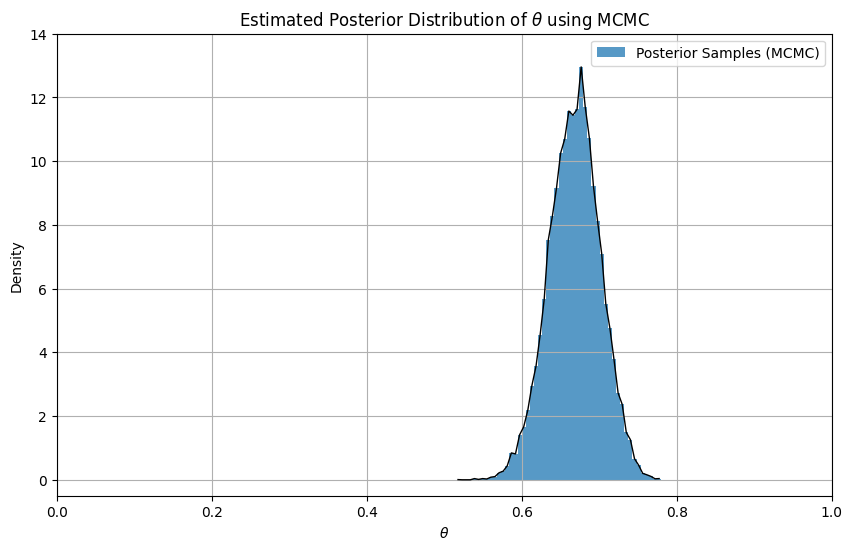

In [25]:
# Metropolis-Hastings MCMC implementation:

chain_length = 30000
parameter_chain = np.empty(chain_length)

parameter_chain[0] = np.random.beta(1, 1)
step_size = 0.08
current_index = 0

while current_index < chain_length - 1:
    candidate_parameter = np.random.normal(parameter_chain[current_index], step_size)

    if 0 < candidate_parameter < 1:
        candidate_posterior = np.prod([binom.pmf(obs, trial_count, candidate_parameter) for obs in observations]) * beta.pdf(candidate_parameter, 1, 1)
        current_posterior = np.prod([binom.pmf(obs, trial_count, parameter_chain[current_index]) for obs in observations]) * beta.pdf(parameter_chain[current_index], 1, 1)

        acceptance_ratio = (candidate_posterior * norm.pdf(parameter_chain[current_index], candidate_parameter, step_size)) / (current_posterior * norm.pdf(candidate_parameter, parameter_chain[current_index], step_size))
        acceptance_probability = min(1, acceptance_ratio)

        if acceptance_probability > np.random.uniform(0, 1):
            parameter_chain[current_index + 1] = candidate_parameter
            current_index += 1
        else:
            parameter_chain[current_index + 1] = parameter_chain[current_index]
            current_index += 1
    else:
        parameter_chain[current_index + 1] = parameter_chain[current_index]
        current_index += 1

plt.figure(figsize=(10, 6))
histogram_counts, histogram_bins, _ = plt.hist(parameter_chain, bins=50, density=True, label='Posterior Samples (MCMC)', alpha=0.75)

bin_midpoints = (histogram_bins[:-1] + histogram_bins[1:]) / 2

plt.plot(bin_midpoints, histogram_counts, linestyle='-', color='black', linewidth=1)
plt.xlim(0, 1)
plt.ylim(-0.5, 14)
plt.title('Estimated Posterior Distribution of $\\theta$ using MCMC')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Question 1-6

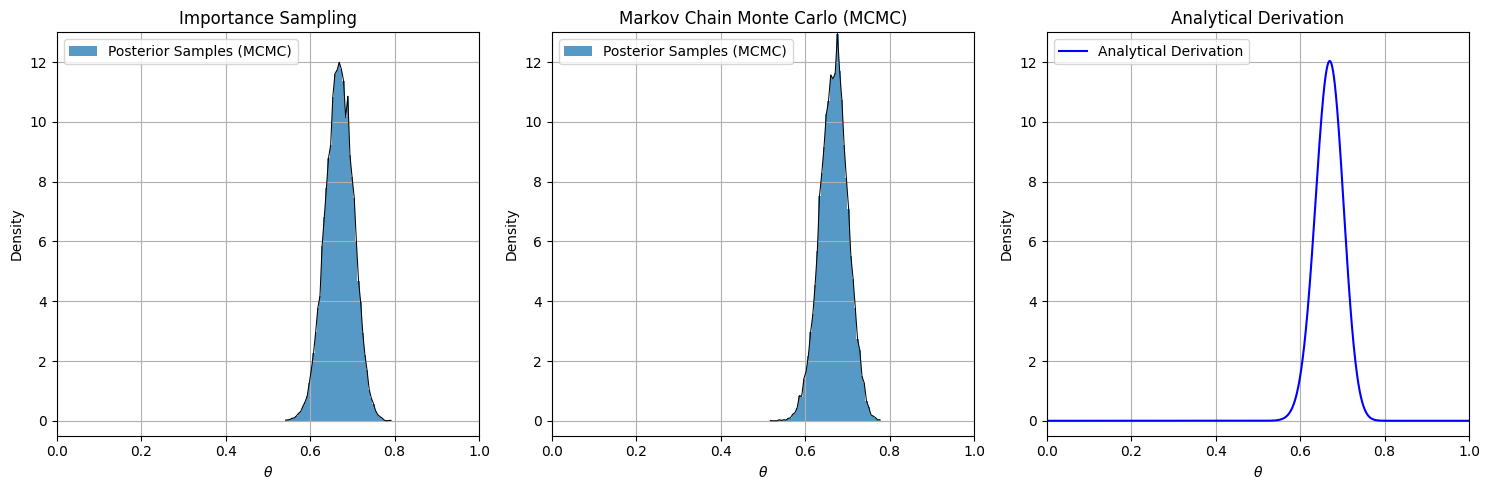

In [26]:
plt.figure(figsize=(15, 5))

# Importance Sampling
plt.subplot(1, 3, 1)
hist_counts, hist_bins, _ = plt.hist(resampled_posterior, bins=50, density=True, label='Posterior Samples (MCMC)', alpha=0.75)
bin_centers = (hist_bins[:-1] + hist_bins[1:]) / 2
plt.plot(bin_centers, hist_counts, linestyle='-', color='black', linewidth=0.75)
plt.title('Importance Sampling')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(-0.5, 13)

# MCMC
plt.subplot(1, 3, 2)
hist_counts, hist_bins, _ = plt.hist(parameter_chain, bins=50, density=True, label='Posterior Samples (MCMC)', alpha=0.75)
bin_centers = (hist_bins[:-1] + hist_bins[1:]) / 2
plt.plot(bin_centers, hist_counts, linestyle='-', color='black', linewidth=0.75)
plt.title('Markov Chain Monte Carlo (MCMC)')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(-0.5, 13)

# Theoretical Solution
plt.subplot(1, 3, 3)
theoretical_parameter_range = np.linspace(0, 1, 1000)
plt.plot(theoretical_parameter_range, theoretical_posterior_density, label='Analytical Derivation', color='blue')
plt.title('Analytical Derivation')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.ylim(-0.5, 13)
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

Question 2-5-1 & 2-5-2

In [27]:
data_source = "https://raw.githubusercontent.com/yadavhimanshu059/CGS698C/main/notes/Data/word-recognition-times.csv"
recognition_data = pd.read_csv(data_source)

recognition_data['category_code'] = np.where(recognition_data['type'] == 'word', 0, 1)

response_times = recognition_data['RT'].values
category_indicators = recognition_data['category_code'].values

def compute_log_likelihood(intercept_param, slope_param, noise_param, response_times, category_indicators):
    expected_values = intercept_param + slope_param * category_indicators
    return np.sum(norm.logpdf(response_times, loc=expected_values, scale=noise_param))

def intercept_log_prior(intercept_param):
    return norm.logpdf(intercept_param, loc=400, scale=50)

def slope_log_prior(slope_param):
    return np.log(truncnorm.pdf(slope_param, a=0, b=np.inf, loc=0, scale=50))

total_iterations = 10000  # Chain length
intercept_samples = np.zeros(total_iterations)
slope_samples = np.zeros(total_iterations)

intercept_samples[0] = np.random.normal(400, 50)
slope_samples[0] = truncnorm.rvs(a=0, b=np.inf, loc=0, scale=50)

intercept_step_size = 0.1
slope_step_size = 0.1

# MCMC sampling loop
iteration_counter = 0
while iteration_counter < total_iterations - 1:

    candidate_intercept = np.random.normal(intercept_samples[iteration_counter], intercept_step_size)
    candidate_slope = truncnorm.rvs(a=0, b=np.inf, loc=slope_samples[iteration_counter], scale=slope_step_size)

    candidate_log_posterior = (compute_log_likelihood(candidate_intercept, candidate_slope, 30, response_times, category_indicators) +
                              intercept_log_prior(candidate_intercept) +
                              slope_log_prior(candidate_slope))

    current_log_posterior = (compute_log_likelihood(intercept_samples[iteration_counter], slope_samples[iteration_counter], 30, response_times, category_indicators) +
                            intercept_log_prior(intercept_samples[iteration_counter]) +
                            slope_log_prior(slope_samples[iteration_counter]))

    acceptance_ratio = np.exp(candidate_log_posterior - current_log_posterior)
    acceptance_probability = min(acceptance_ratio, 1)

    if acceptance_probability > np.random.uniform(0, 1):
        intercept_samples[iteration_counter + 1] = candidate_intercept
        slope_samples[iteration_counter + 1] = candidate_slope
        iteration_counter += 1

intercept_confidence_bounds = np.quantile(intercept_samples, [0.025, 0.975])
slope_confidence_bounds = np.quantile(slope_samples, [0.025, 0.975])

print("First few samples of alpha:")
print(intercept_confidence_bounds[:10])
print("First few samples of beta:")
print(slope_confidence_bounds[:10])
print(f"95% credible interval for alpha: {intercept_confidence_bounds}")
print(f"95% credible interval for beta: {slope_confidence_bounds}")

First few samples of alpha:
[310.86884703 372.95987654]
First few samples of beta:
[ 78.64415875 205.2152287 ]
95% credible interval for alpha: [310.86884703 372.95987654]
95% credible interval for beta: [ 78.64415875 205.2152287 ]


Question 3-1

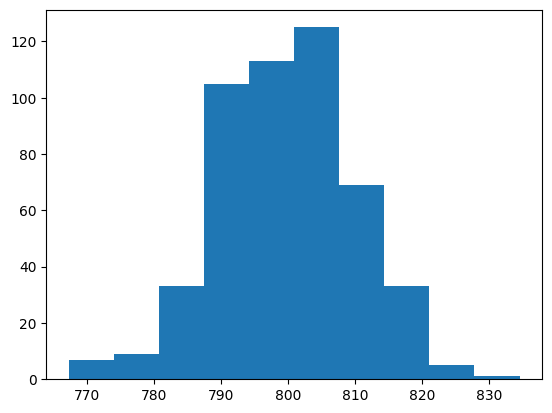

In [28]:
population_mean = 800
population_variance = 100  # variance parameter
simulated_observations = np.random.normal(loc=population_mean, scale=np.sqrt(population_variance), size=500)
plt.hist(simulated_observations)
plt.show()

In [29]:
def compute_derivatives(location_param, scale_param, observations, sample_size, prior_location, prior_scale, shape_alpha, shape_beta):
    location_derivative = (((sample_size * location_param) - np.sum(observations)) / (scale_param**2)) + ((location_param - prior_location) / (prior_scale**2))
    scale_derivative = (sample_size / scale_param) - (np.sum((observations - location_param)**2) / (scale_param**3)) + ((scale_param - shape_alpha) / (shape_beta**2))
    return np.array([location_derivative, scale_derivative])

# Energy function
def energy_function(location_param, scale_param, observations, sample_size, prior_location, prior_scale, shape_alpha, shape_beta):
    negative_log_density = -(np.sum(norm.logpdf(observations, location_param, scale_param)) +
                            norm.logpdf(location_param, prior_location, prior_scale) +
                            norm.logpdf(scale_param, shape_alpha, shape_beta))
    return negative_log_density

# Hamiltonian Monte Carlo
def hamiltonian_monte_carlo(observations, sample_size, prior_location, prior_scale, shape_alpha, shape_beta,
                           step_length, leapfrog_count, starting_position, chain_length, warmup_length):
    location_trajectory = np.zeros(chain_length)
    scale_trajectory = np.zeros(chain_length)
    rejection_tally = 0

    location_trajectory[0] = starting_position[0]
    scale_trajectory[0] = starting_position[1]

    # Markov chain
    for step_idx in range(1, chain_length):
        current_state = np.array([location_trajectory[step_idx - 1], scale_trajectory[step_idx - 1]])
        momentum_vector = np.random.normal(0, 1, 2)  # Initialize momentum
        initial_state = current_state.copy()
        initial_momentum = momentum_vector.copy()
        initial_energy = energy_function(initial_state[0], initial_state[1], observations, sample_size,
                                       prior_location, prior_scale, shape_alpha, shape_beta)
        initial_kinetic = np.sum(initial_momentum**2) / 2

        # Leapfrog integration
        for leap_step in range(leapfrog_count):
            momentum_vector -= (step_length / 2) * compute_derivatives(current_state[0], current_state[1],
                                                                      observations, sample_size, prior_location,
                                                                      prior_scale, shape_alpha, shape_beta)
            current_state += step_length * momentum_vector
            momentum_vector -= (step_length / 2) * compute_derivatives(current_state[0], current_state[1],
                                                                      observations, sample_size, prior_location,
                                                                      prior_scale, shape_alpha, shape_beta)

        final_state = current_state.copy()
        final_momentum = momentum_vector.copy()
        final_energy = energy_function(final_state[0], final_state[1], observations, sample_size,
                                     prior_location, prior_scale, shape_alpha, shape_beta)
        final_kinetic = np.sum(final_momentum**2) / 2

        # Metropolis criterion
        transition_probability = min(1, np.exp(initial_energy + initial_kinetic - final_energy - final_kinetic))

        # State acceptance/rejection
        if transition_probability > np.random.rand():
            location_trajectory[step_idx] = final_state[0]
            scale_trajectory[step_idx] = final_state[1]
        else:
            location_trajectory[step_idx] = initial_state[0]
            scale_trajectory[step_idx] = initial_state[1]
            rejection_tally += 1

    # Discard burn-in period
    location_trajectory = location_trajectory[warmup_length:]
    scale_trajectory = scale_trajectory[warmup_length:]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(location_trajectory)
    plt.title(f'Location Parameter Chain (N={chain_length}, δ={step_length})')
    plt.xlabel('Iteration')
    plt.ylabel('μ')

    plt.subplot(1, 2, 2)
    plt.plot(scale_trajectory)
    plt.title(f'Scale Parameter Chain (N={chain_length}, δ={step_length})')
    plt.xlabel('Iteration')
    plt.ylabel('σ')

    plt.tight_layout()
    plt.show()

    return pd.DataFrame({'mu_chain': location_trajectory, 'sigma_chain': scale_trajectory})

/tmp/ipython-input-29-4174218839.py:50: RuntimeWarning: overflow encountered in exp
  transition_probability = min(1, np.exp(initial_energy + initial_kinetic - final_energy - final_kinetic))


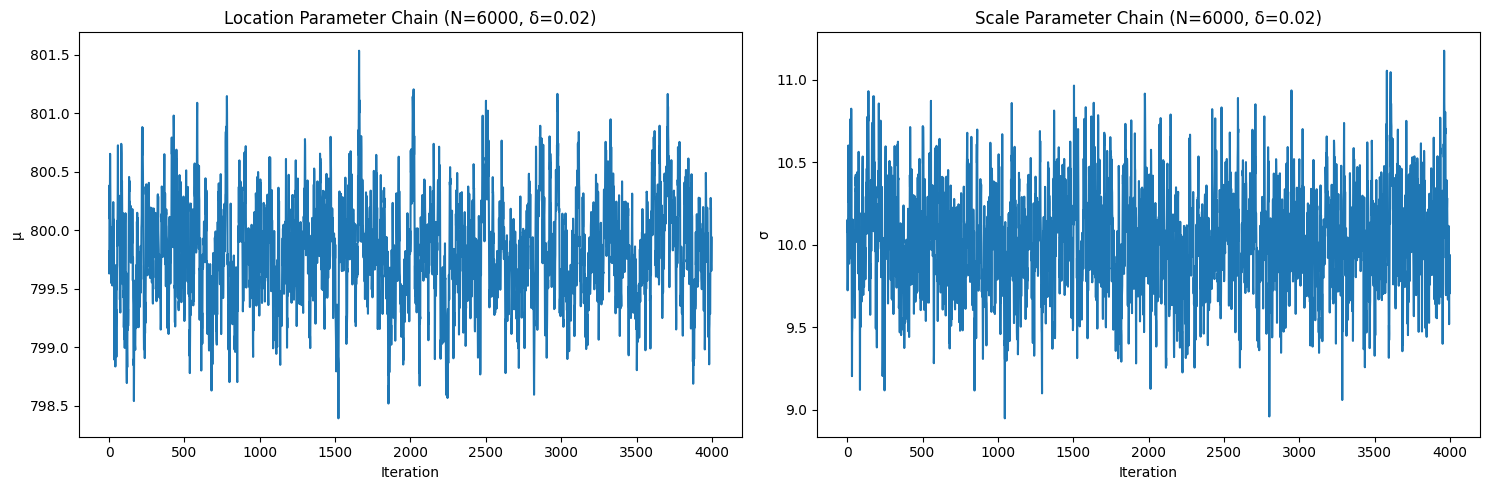

95% credible interval for μ: [798.98060193 800.69234717]
95% credible interval for σ: [ 9.42771722 10.65371654]


In [30]:
np.random.seed(0)
population_mean = 800
population_variance = 100
simulated_observations = np.random.normal(population_mean, np.sqrt(population_variance), 500)

chain_length = 6000 # Sampling parameters
warmup_length = 2000
step_length = 0.02
leapfrog_count = 12
starting_position = [1000, 11]

posterior_distribution = hamiltonian_monte_carlo(observations=simulated_observations, sample_size=len(simulated_observations),
                                               prior_location=1000, prior_scale=20, shape_alpha=10, shape_beta=2,
                                               step_length=step_length, leapfrog_count=leapfrog_count,
                                               starting_position=starting_position, chain_length=chain_length,
                                               warmup_length=warmup_length)

location_uncertainty = np.percentile(posterior_distribution['mu_chain'], [2.5, 97.5])
scale_uncertainty = np.percentile(posterior_distribution['sigma_chain'], [2.5, 97.5])

print(f"95% credible interval for μ: {location_uncertainty}")
print(f"95% credible interval for σ: {scale_uncertainty}")

Question 3-2

/tmp/ipython-input-29-4174218839.py:50: RuntimeWarning: overflow encountered in exp
  transition_probability = min(1, np.exp(initial_energy + initial_kinetic - final_energy - final_kinetic))


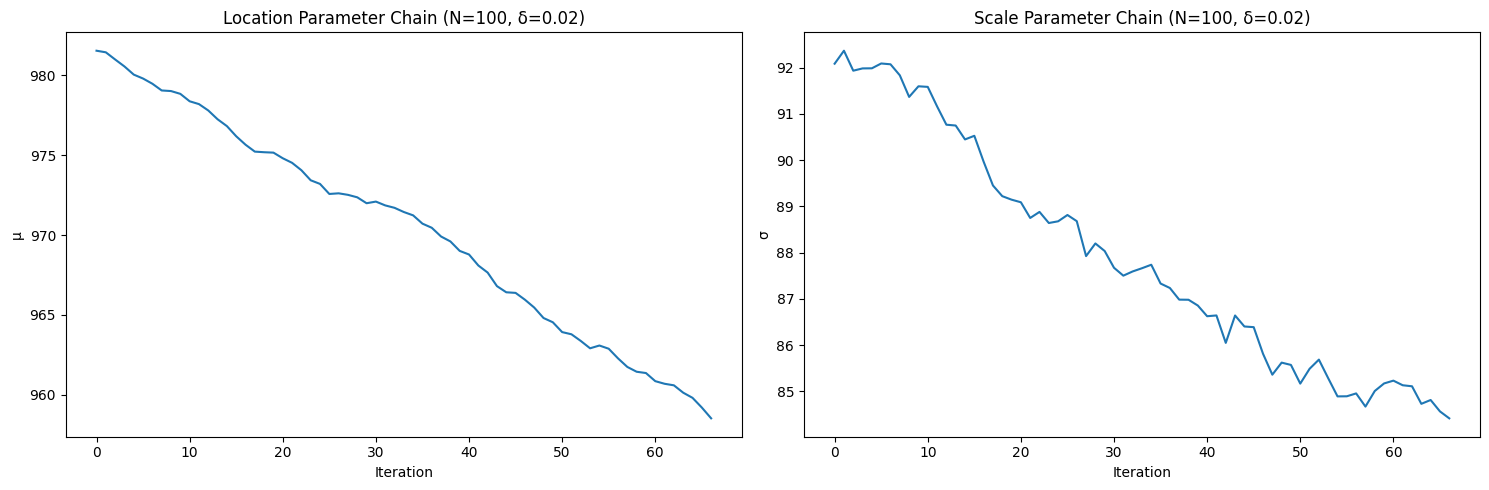

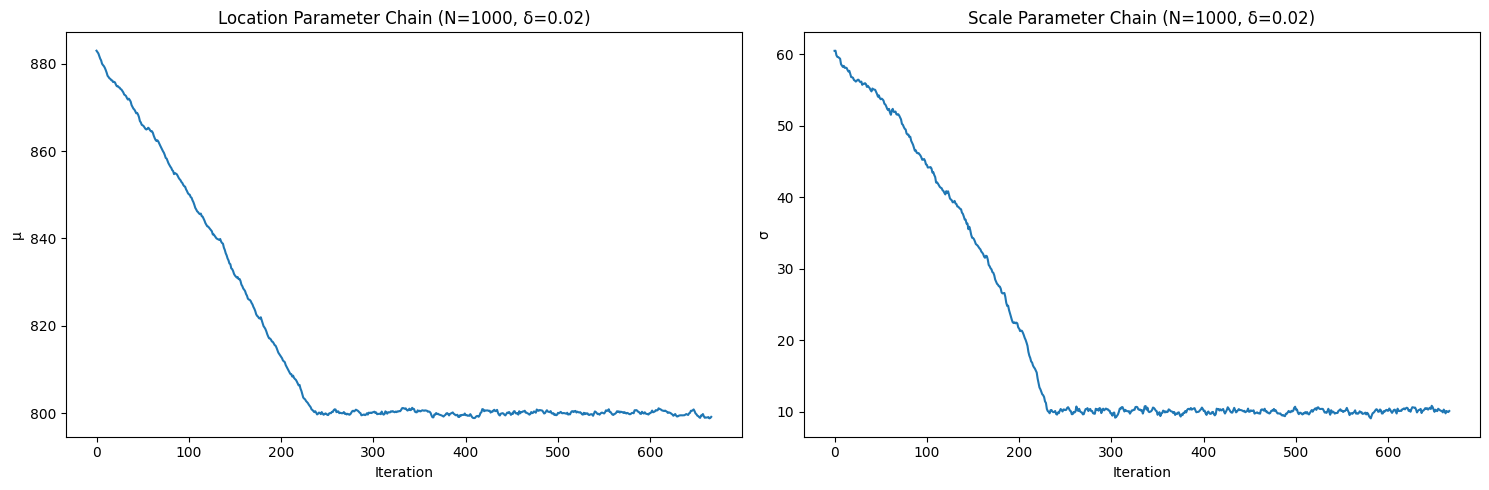

/tmp/ipython-input-29-4174218839.py:50: RuntimeWarning: overflow encountered in exp
  transition_probability = min(1, np.exp(initial_energy + initial_kinetic - final_energy - final_kinetic))


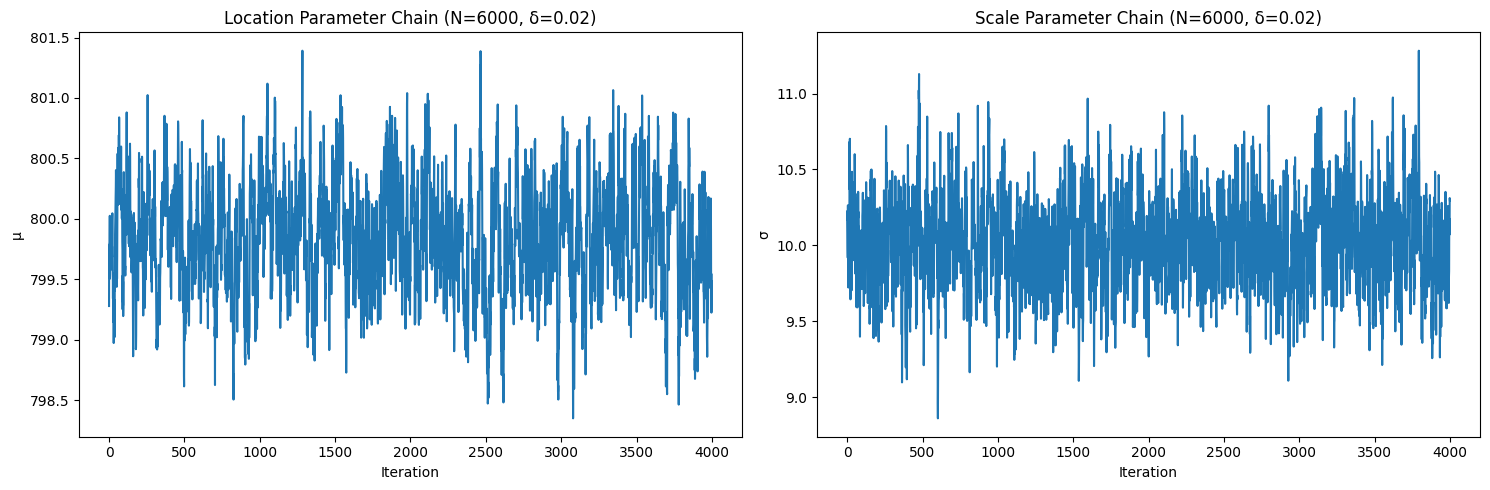

95% credible interval for mu (N = 100): [959.59974489 981.14786023]
95% credible interval for sigma (N = 100): [84.63730401 92.08407902]

95% credible interval for mu (N = 1000): [799.13084196 876.22847584]
95% credible interval for sigma (N = 1000): [ 9.56977243 57.39392808]

95% credible interval for mu (N = 6000): [798.95389755 800.73019643]
95% credible interval for sigma (N = 6000): [ 9.44949232 10.64445741]



In [31]:
sampling_configurations = [100, 1000, 6000]
warmup_proportions = [1/3, 1/3, 1/3]
step_length = 0.02
leapfrog_count = 12
starting_position = [1000, 11]

sampling_experiments = []

for total_samples, warmup_proportion in zip(sampling_configurations, warmup_proportions):
    warmup_samples = int(total_samples * warmup_proportion)
    posterior_samples = hamiltonian_monte_carlo(observations=simulated_observations, sample_size=len(simulated_observations),
                                              prior_location=1000, prior_scale=20, shape_alpha=10, shape_beta=2,
                                              step_length=step_length, leapfrog_count=leapfrog_count,
                                              starting_position=starting_position, chain_length=total_samples,
                                              warmup_length=warmup_samples)
    sampling_experiments.append((total_samples, posterior_samples))

for total_samples, posterior_samples in sampling_experiments:
    location_bounds = np.quantile(posterior_samples['mu_chain'], [0.025, 0.975])
    scale_bounds = np.quantile(posterior_samples['sigma_chain'], [0.025, 0.975])
    print(f"95% credible interval for mu (N = {total_samples}): {location_bounds}")
    print(f"95% credible interval for sigma (N = {total_samples}): {scale_bounds}\n")

Question 3-3

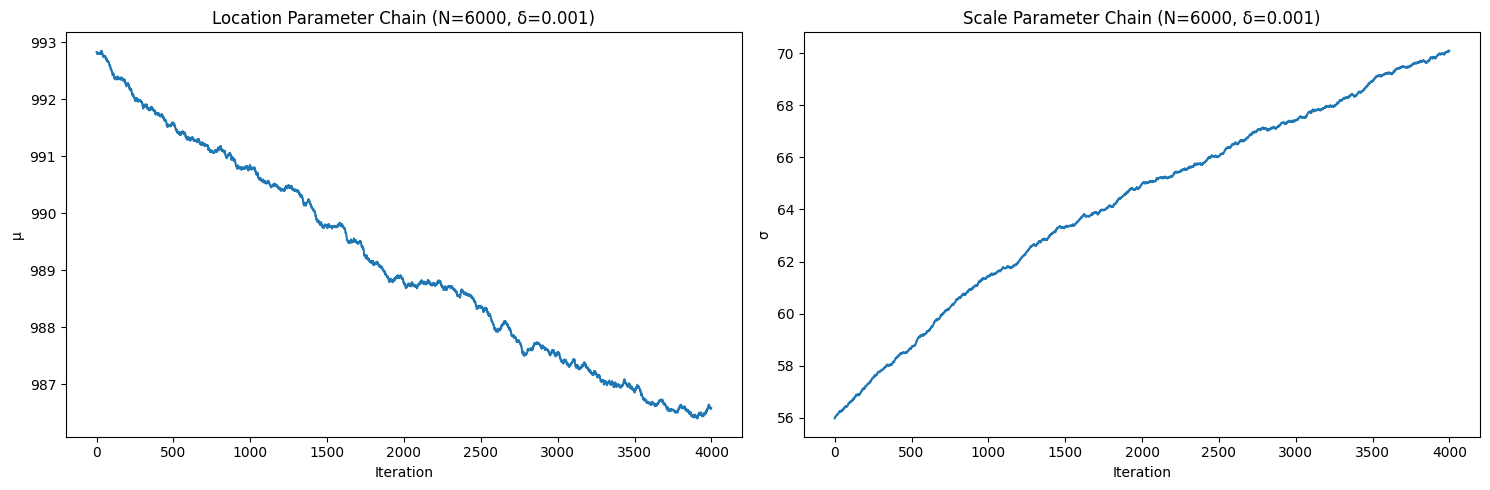

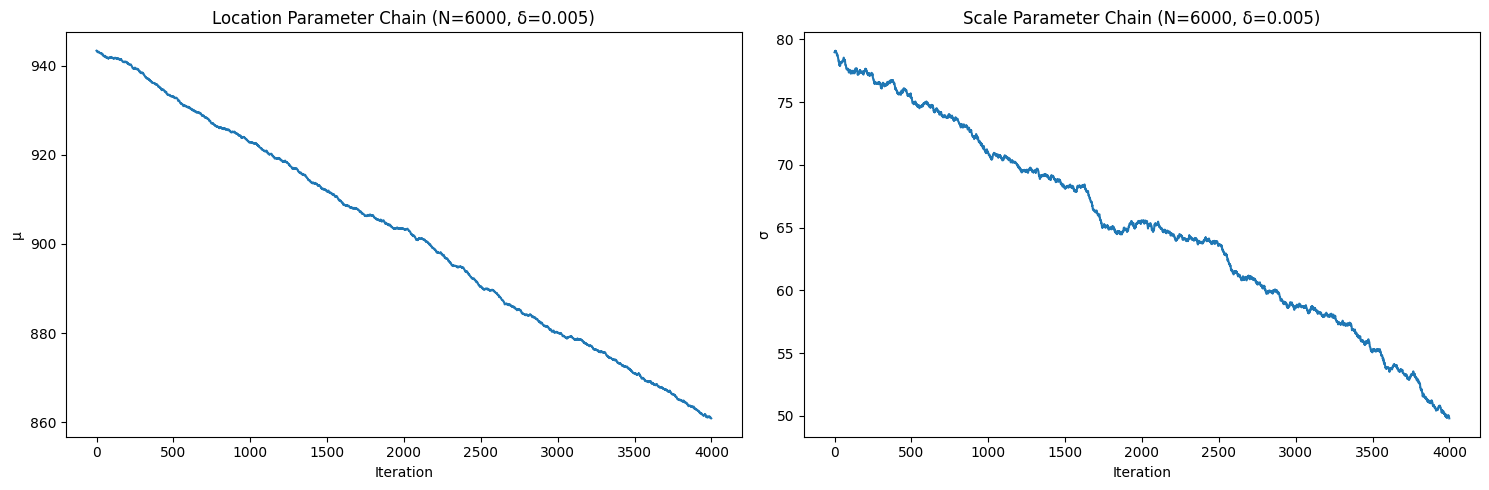

/tmp/ipython-input-29-4174218839.py:50: RuntimeWarning: overflow encountered in exp
  transition_probability = min(1, np.exp(initial_energy + initial_kinetic - final_energy - final_kinetic))


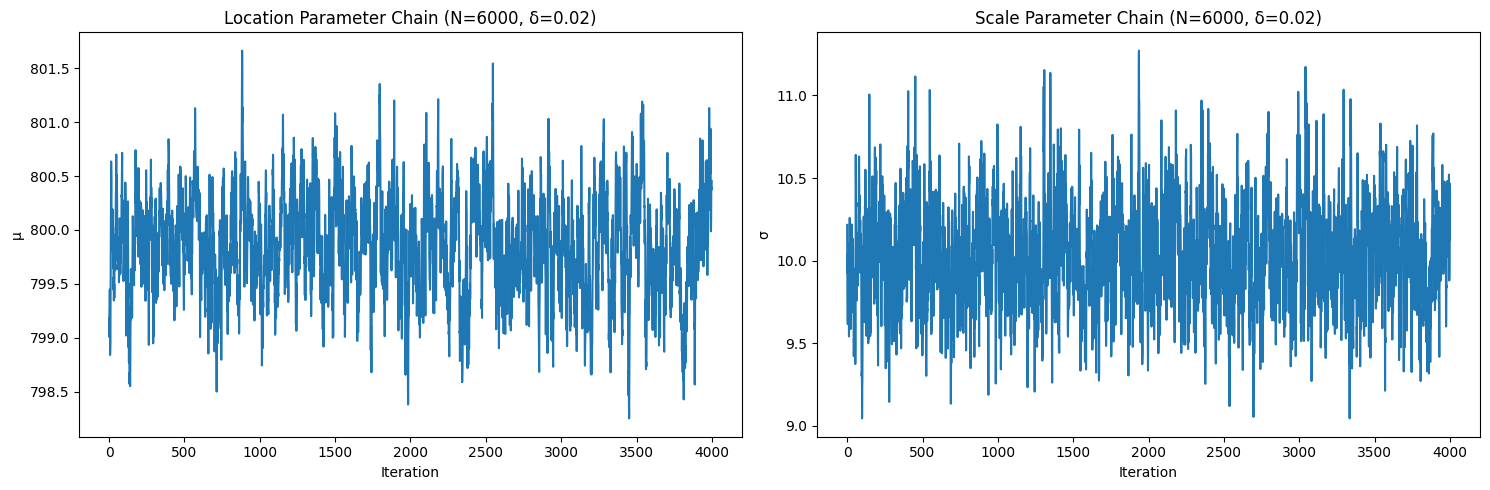

95% credible interval for mu (δ = 0.001): [986.49275773 992.48127321]
95% credible interval for sigma (δ = 0.001): [56.60202545 69.82925746]

95% credible interval for mu (δ = 0.005): [862.94812481 941.75400409]
95% credible interval for sigma (δ = 0.005): [50.80799741 77.60283598]

95% credible interval for mu (δ = 0.02): [798.92289674 800.73972541]
95% credible interval for sigma (δ = 0.02): [ 9.44234403 10.67731551]



In [32]:
step_size_variants = [0.001, 0.005, 0.02]
leapfrog_count = 12
starting_position = [1000, 11]
chain_length = 6000
warmup_proportion = 1/3
warmup_samples = int(chain_length * warmup_proportion)

step_size_experiments = []

for current_step_size in step_size_variants:
    posterior_samples = hamiltonian_monte_carlo(observations=simulated_observations, sample_size=len(simulated_observations),
                                              prior_location=1000, prior_scale=20, shape_alpha=10, shape_beta=2,
                                              step_length=current_step_size, leapfrog_count=leapfrog_count,
                                              starting_position=starting_position, chain_length=chain_length,
                                              warmup_length=warmup_samples)
    step_size_experiments.append((current_step_size, posterior_samples))

for current_step_size, posterior_samples in step_size_experiments:
    location_bounds = np.quantile(posterior_samples['mu_chain'], [0.025, 0.975])
    scale_bounds = np.quantile(posterior_samples['sigma_chain'], [0.025, 0.975])
    print(f"95% credible interval for mu (δ = {current_step_size}): {location_bounds}")
    print(f"95% credible interval for sigma (δ = {current_step_size}): {scale_bounds}\n")

Question 3-4

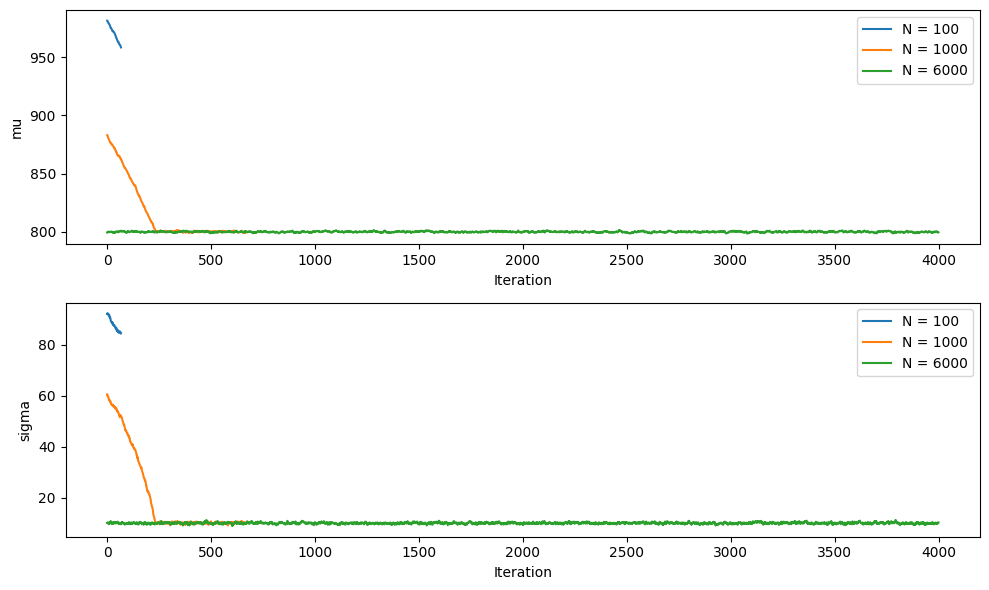

The μ and σ chains from HMC for very small sample size gives highly inaccurate results and also for 1000 samples it starts to show decent results mostly at the end of chain


In [33]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(sampling_experiments[0][1]['mu_chain'], label='N = 100')
plt.plot(sampling_experiments[1][1]['mu_chain'], label='N = 1000')
plt.plot(sampling_experiments[2][1]['mu_chain'], label='N = 6000')
plt.xlabel('Iteration')
plt.ylabel('mu')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sampling_experiments[0][1]['sigma_chain'], label='N = 100')
plt.plot(sampling_experiments[1][1]['sigma_chain'], label='N = 1000')
plt.plot(sampling_experiments[2][1]['sigma_chain'], label='N = 6000')
plt.xlabel('Iteration')
plt.ylabel('sigma')
plt.legend()

plt.tight_layout()
plt.show()

print('The μ and σ chains from HMC for very small sample size gives highly inaccurate results and also for 1000 samples it starts to show decent results mostly at the end of chain')

Question 3-5

For m = 400 & s = 5


/tmp/ipython-input-29-4174218839.py:50: RuntimeWarning: overflow encountered in exp
  transition_probability = min(1, np.exp(initial_energy + initial_kinetic - final_energy - final_kinetic))


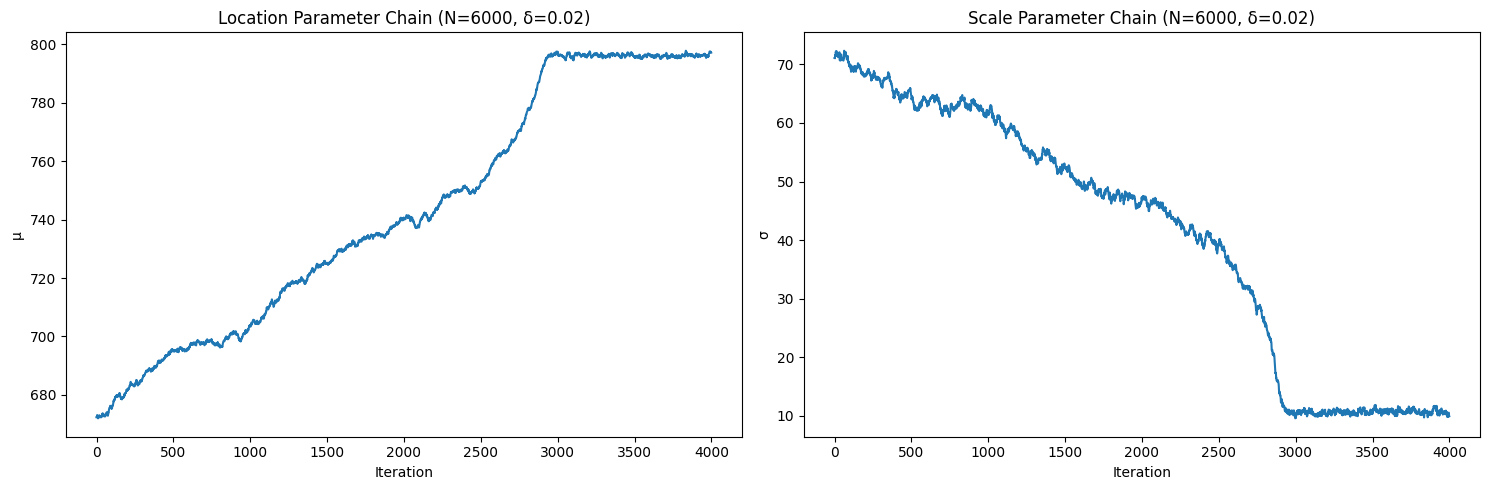

For m = 400 & s = 20


/tmp/ipython-input-29-4174218839.py:50: RuntimeWarning: overflow encountered in exp
  transition_probability = min(1, np.exp(initial_energy + initial_kinetic - final_energy - final_kinetic))


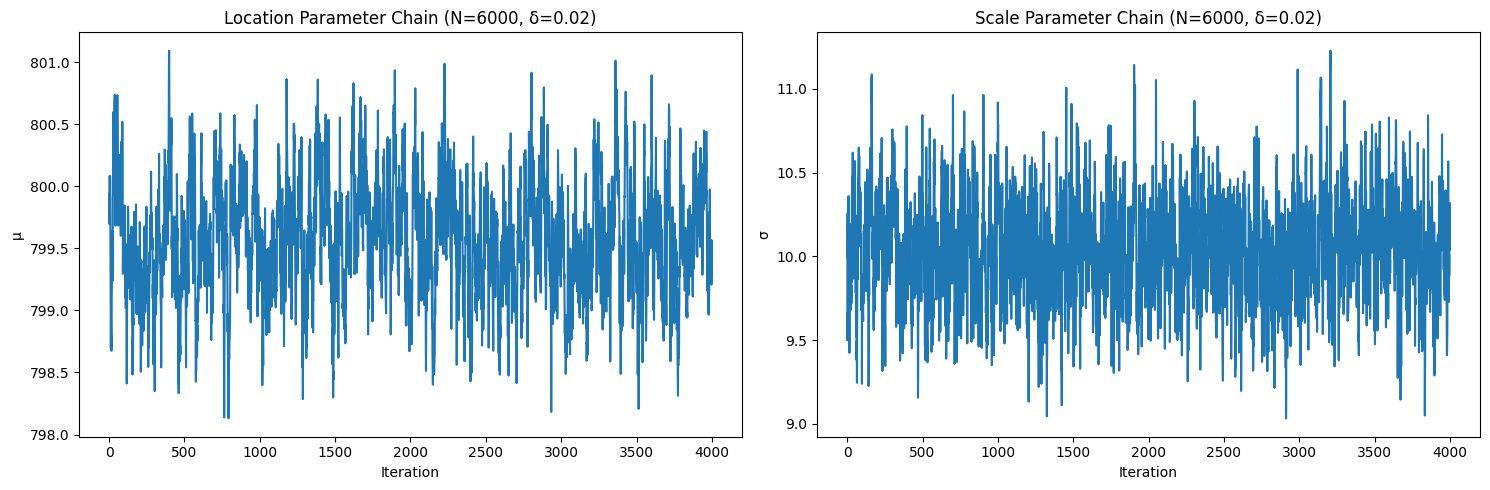

For m = 1000 & s = 5


/tmp/ipython-input-29-4174218839.py:50: RuntimeWarning: overflow encountered in exp
  transition_probability = min(1, np.exp(initial_energy + initial_kinetic - final_energy - final_kinetic))


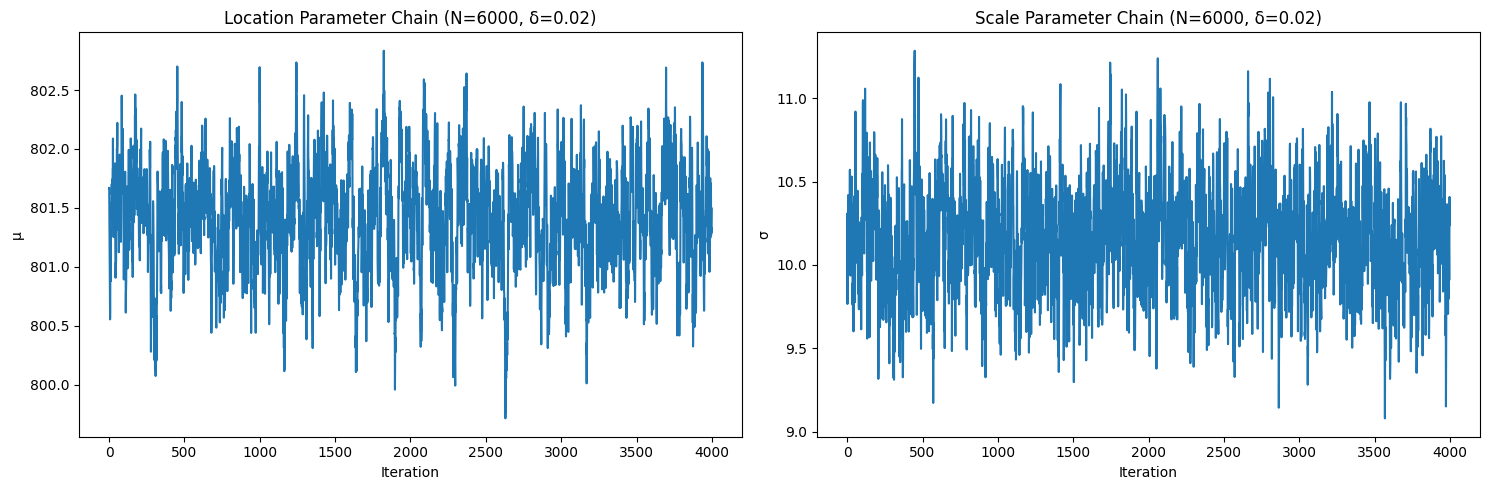

For m = 1000 & s = 20


/tmp/ipython-input-29-4174218839.py:50: RuntimeWarning: overflow encountered in exp
  transition_probability = min(1, np.exp(initial_energy + initial_kinetic - final_energy - final_kinetic))


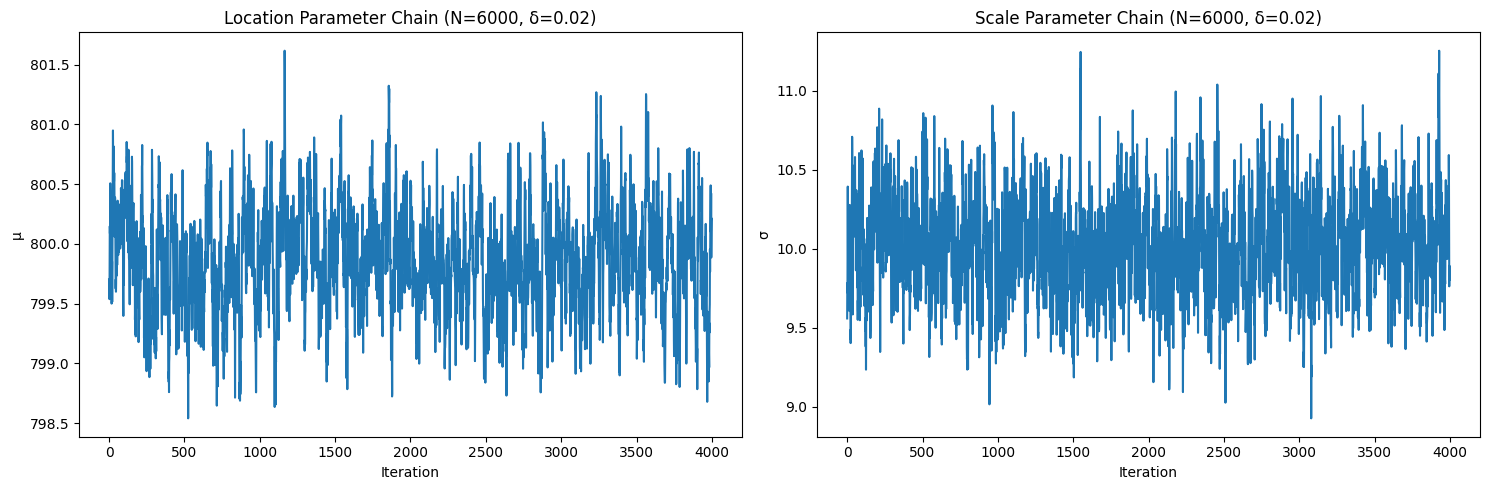

For m = 1000 & s = 100


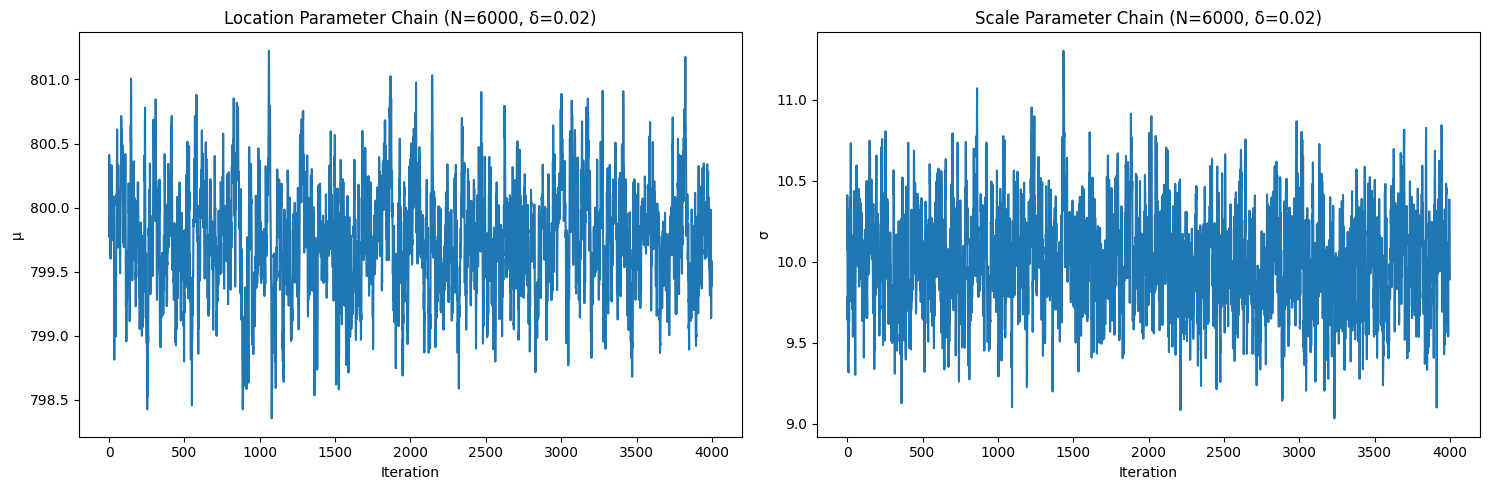

In [34]:
prior_location_variants = [400, 400, 1000, 1000, 1000]
prior_scale_variants = [5, 20, 5, 20, 100]
warmup_proportions = [1/3, 1/3, 1/3, 1/3, 1/3]

prior_sensitivity_experiments = []

for prior_loc, prior_scale_val, warmup_prop in zip(prior_location_variants, prior_scale_variants, warmup_proportions):
    chain_length = 6000
    warmup_samples = int(chain_length * warmup_prop)
    starting_position = [prior_loc, 11]
    print(f'For m = {prior_loc} & s = {prior_scale_val}')
    posterior_sensitivity = hamiltonian_monte_carlo(observations=simulated_observations, sample_size=len(simulated_observations),
                                                  prior_location=prior_loc, prior_scale=prior_scale_val,
                                                  shape_alpha=10, shape_beta=2, step_length=0.02,
                                                  leapfrog_count=12, starting_position=starting_position,
                                                  chain_length=chain_length, warmup_length=warmup_samples)
    prior_sensitivity_experiments.append((f"μ ~ Normal(m={prior_loc}, s={prior_scale_val})", posterior_sensitivity))